## Case: Rice Leaf Disease Detection

In [1]:
## Importing the libraries
import os
import glob
import PIL
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


### Loading the data

In [3]:
import splitfolders
splitfolders.ratio(r'C:\Users\Lenovo\Downloads\bacterical disease-20220923T063120Z-001\bacterical disease', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 120 files [00:00, 1153.66 files/s]


### Sorting the data into test, train, validation

In [4]:
# Sorting the path of data into variable
train_dir = r'C:\Users\Lenovo\Documents\02 MAY- CDS- ONLINE- WEEKDAY\Capstone projects\Rice Disease\output\train'  #Location of training images
validation_dir = r'C:\Users\Lenovo\Documents\02 MAY- CDS- ONLINE- WEEKDAY\Capstone projects\Rice Disease\output\val' # Location of test images
test_dir =r'C:\Users\Lenovo\Documents\02 MAY- CDS- ONLINE- WEEKDAY\Capstone projects\Rice Disease\output\test' # Location of test images

In [5]:
class_names=['Bacterial Blight','Brown spot','Leaf smut']

### Generation of validation and training batch of images

In [6]:
train_datagen= ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=(1./255))

In [7]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(180,180),
                                        batch_size=16,color_mode='rgb',class_mode='categorical')

validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(180,180),
                                        batch_size=16,color_mode='rgb',class_mode='categorical')


Found 96 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [8]:
train_generator.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [9]:
validation_generator.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [10]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

### Plotting the images with their labels

In [44]:
def plots(ims, figsize=(20,15), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])

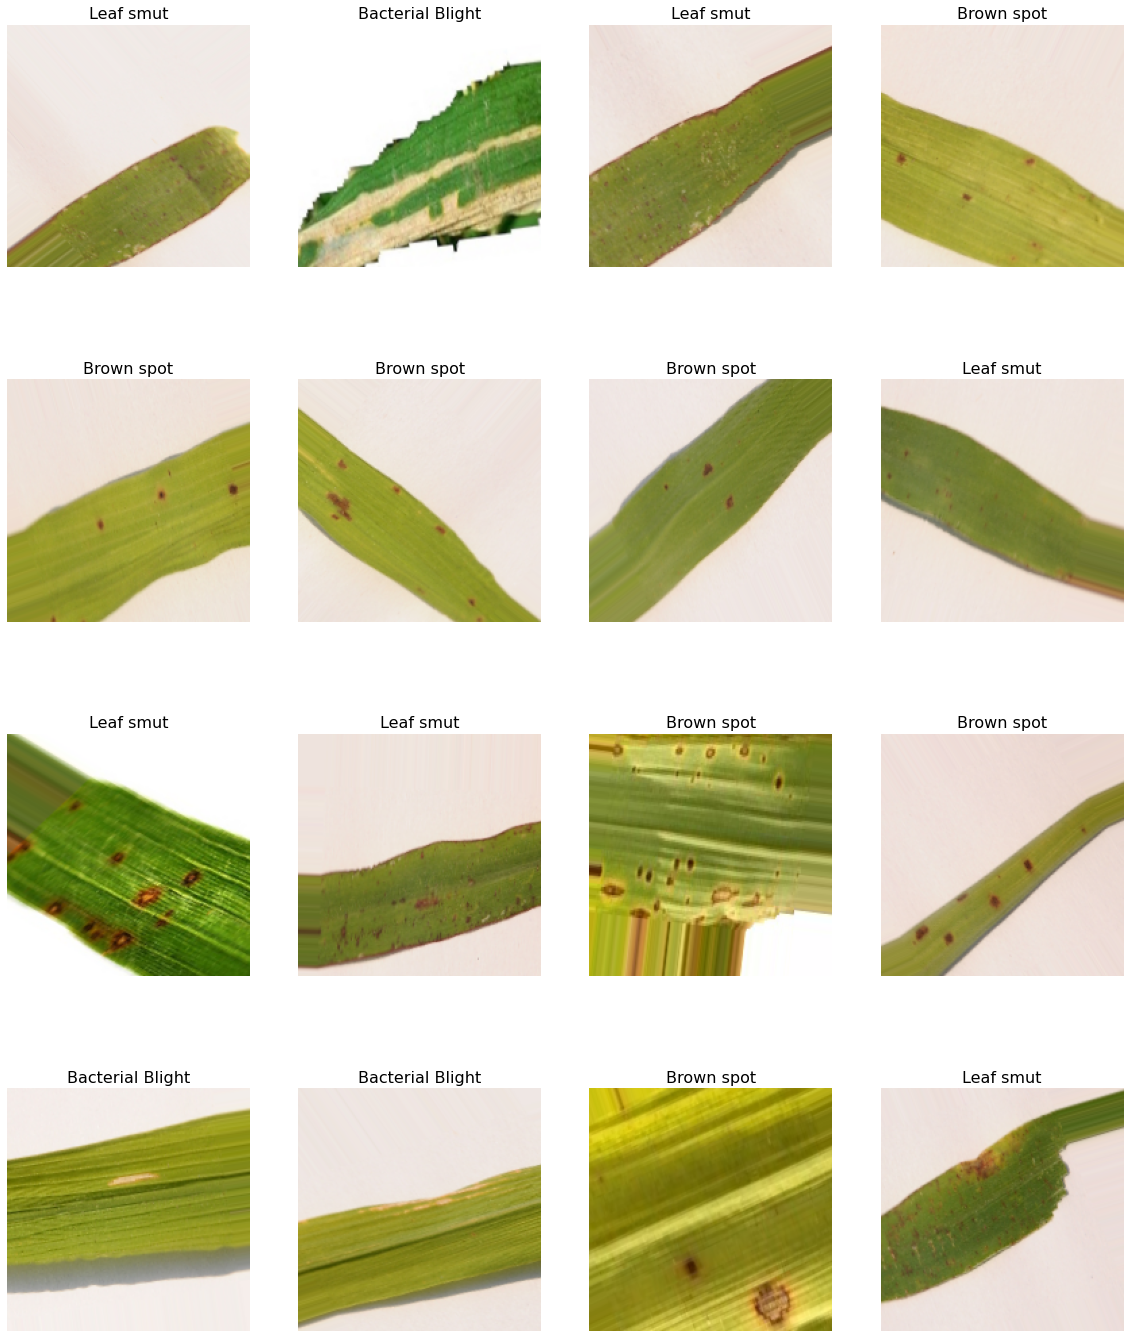

In [12]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)

### CNN model architecture

In [25]:
from keras.layers.core.activation import Activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import models,layers
model =models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(180,180,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))

### Model summary

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 20, 20, 128)     

### Compliling the model

In [27]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the model

In [36]:
history= model.fit_generator(train_generator,epochs=30,validation_data =validation_generator,)

Epoch 1/30
6/6 [==============================] - 5s 767ms/step - loss: 0.2774 - accuracy: 0.8854 - val_loss: 0.5232 - val_accuracy: 0.8333
Epoch 2/30
6/6 [==============================] - 4s 671ms/step - loss: 0.2627 - accuracy: 0.9062 - val_loss: 0.5194 - val_accuracy: 0.8333
Epoch 3/30
6/6 [==============================] - 4s 662ms/step - loss: 0.2755 - accuracy: 0.8646 - val_loss: 1.0531 - val_accuracy: 0.8333
Epoch 4/30
6/6 [==============================] - 4s 667ms/step - loss: 0.4923 - accuracy: 0.8021 - val_loss: 0.7435 - val_accuracy: 0.6667
Epoch 5/30
6/6 [==============================] - 4s 663ms/step - loss: 0.3346 - accuracy: 0.8542 - val_loss: 0.8910 - val_accuracy: 0.7500
Epoch 6/30
6/6 [==============================] - 4s 652ms/step - loss: 0.3786 - accuracy: 0.8542 - val_loss: 0.4637 - val_accuracy: 0.8333
Epoch 7/30
6/6 [==============================] - 4s 648ms/step - loss: 0.2539 - accuracy: 0.9062 - val_loss: 1.2266 - val_accuracy: 0.7500
Epoch 8/30
6/6 [====

After training the model,the following data were gathered:
Training accuracy:90.62%
Validation accuracy: 80%

### Saving the model

In [37]:
model.save('model.h4')

INFO:tensorflow:Assets written to: model.h4\assets


INFO:tensorflow:Assets written to: model.h4\assets


### Plotting the training and validation accuracy and training and validation loss

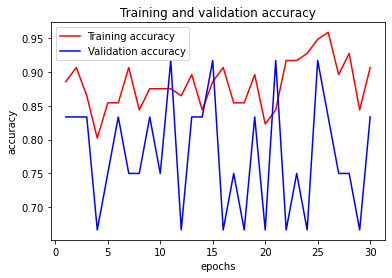

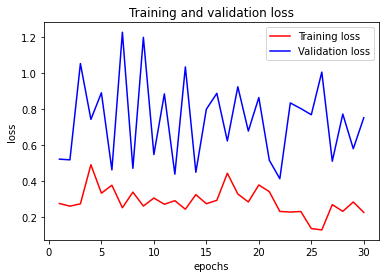

In [38]:
# Plotting the training loss and validation loss
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

### Model Summary

In [39]:
model = tf.keras.models.load_model("model.h4")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 20, 20, 128)     

### Evaluation and testing of model

In [40]:
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 12 images belonging to 3 classes.


In [41]:
model.evaluate(test_generator)

1/1 [==============================] - 0s 378ms/step - loss: 1.3941 - accuracy: 0.8333


[1.3940902948379517, 0.8333333134651184]

 According to the evaluation, loss is 1.39 and accuracy is 83.33%

### Visualisation of model prediction

1/1 [==============================] - 0s 20ms/step


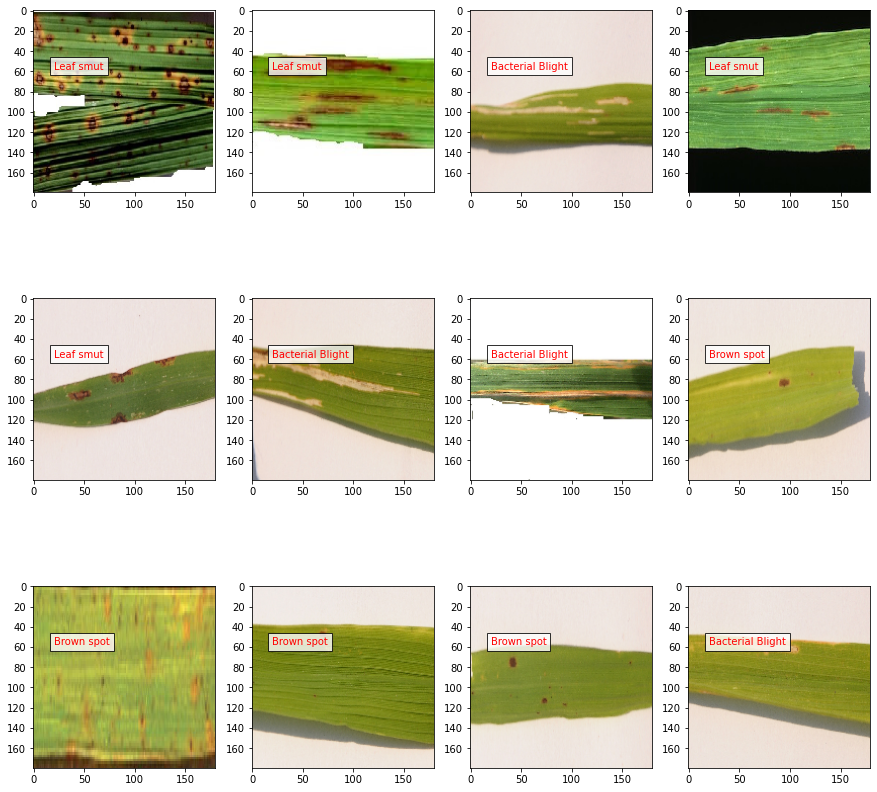

In [43]:
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 4
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])